<h1>목표 : 부산시 구별로 폐기물 발생량 예측</h1>

1. 시별로 발생량에 매립, 소각 비율 확인 

2. 재활용 분리 배출 범주에 매립, 소각이 있는지 확인, 재활용 종류별 발생량 확인

3. 종량제 혼합 배출량에 매립, 소각 비율 확인, 연도별 추세 확인

4. 결론

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'C:\workspace\폐기물데이터_행정구역변경_2.csv'
df = pd.read_csv(file_path, encoding='cp949')

df.head(5)

,행정구역,시도,시군구,폐기물_종류,폐기물_종류1,폐기물_종류2,재활용,소각,매립,기타,발생량,연도
0,서울_종로구,서울,종로구,종량제방식 등 혼합배출,가연성,폐지류,0.0,9125.0,4672.0,0.0,13797.0,2019
1,서울_종로구,서울,종로구,종량제방식 등 혼합배출,가연성,폐합성수지류,0.0,5365.5,2737.5,0.0,8103.0,2019
2,서울_종로구,서울,종로구,종량제방식 등 혼합배출,가연성,폐고무류,0.0,182.5,73.0,0.0,255.5,2019
3,서울_종로구,서울,종로구,종량제방식 등 혼합배출,가연성,폐섬유류,0.0,511.0,255.5,0.0,766.5,2019
4,서울_종로구,서울,종로구,종량제방식 등 혼합배출,가연성,음식물류 폐기물,0.0,693.5,365.0,0.0,1058.5,2019


In [6]:
# 폰트 깨짐 방지
import matplotlib.font_manager as fm # 폰트 매니저 불러오기

font_path = ''
for font in fm.fontManager.ttflist:
    if 'Malgun Gothic' in font.name: # 윈도우 사용자
    # if 'AppleGothic' in font.name: # macOS 사용자
    # if 'NanumGothic' in font.name: # 나눔 고딕이 설치된 경우
        font_path = font.fname
        break

if font_path:
    # 2. 찾은 폰트 경로로 matplotlib의 폰트 설정
    plt.rcParams['font.family'] = fm.FontProperties(fname=font_path).get_name()
    print(f"폰트 설정 완료: {plt.rcParams['font.family']}")
else:
    print("한글 폰트를 찾을 수 없습니다. 나눔 고딕 등을 설치해 보세요.")
    # 대체 폰트 설정 (만약 나눔고딕이 있다면)
    # plt.rcParams['font.family'] = 'NanumGothic'


# 3. 마이너스 부호 깨짐 방지 (선택 사항이지만 함께 설정하는 것이 좋음)
plt.rcParams['axes.unicode_minus'] = False

폰트 설정 완료: ['Malgun Gothic']


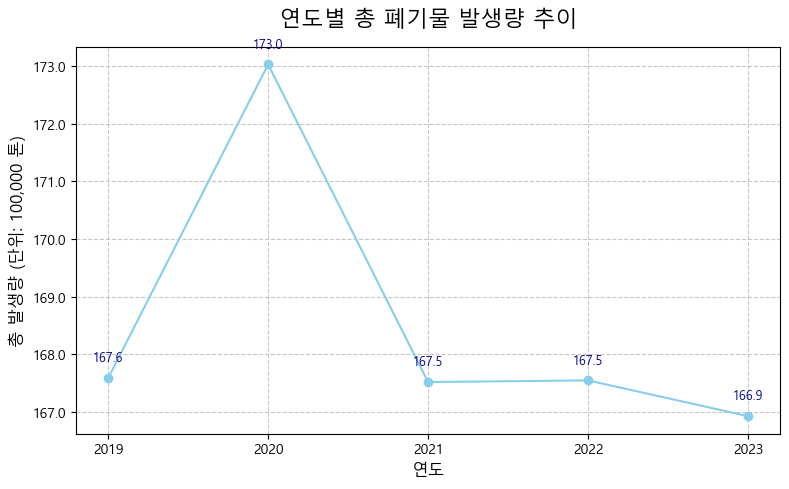

In [117]:
# --- 3. 데이터 그룹화 및 재구조화 ---
# '연도'별로 '발생량'을 합산하고, 'reset_index()'로 '연도'를 다시 컬럼으로 만듭니다.
yearly_total = df.groupby('연도')['발생량'].sum().reset_index()


# --- 4. 그래프 그리기 ---
fig, ax = plt.subplots(figsize=(8, 5)) # Figure와 Axes 객체 생성

# 데이터 플롯팅 (ax=ax를 통해 현재 Axes 객체에 그림)
ax.plot(yearly_total['연도'], yearly_total['발생량'], marker='o', color='skyblue')


# --- 5. 포인트마다 수치 표시 (핵심 추가 부분!) ---
# Y축 단위 1e5 (10만)로 변경하는 포매터 재활용 (이전 대화 내용 반영)
import matplotlib.ticker as mticker
scale_factor = 1e5

# 각 포인트에 텍스트를 추가하는 루프
for i in range(len(yearly_total)):
    x_coord = yearly_total['연도'].iloc[i] # 현재 포인트의 연도 (x좌표)
    y_coord = yearly_total['발생량'].iloc[i] # 현재 포인트의 발생량 (y좌표)

    # 텍스트 포맷팅 (10만 단위로 소수점 1자리)
    text_to_display = f'{y_coord / scale_factor:.1f}'

    # 텍스트 주석 추가
    ax.annotate(text_to_display,              # 표시할 텍스트
                (x_coord, y_coord),           # 마커의 (x, y) 좌표
                textcoords="offset points",   # 텍스트 좌표를 상대적으로 지정
                xytext=(0, 10),               # x, y 방향으로 띄울 정도 (픽셀 단위)
                ha='center',                  # 수평 정렬 (가운데)
                va='bottom',                  # 수직 정렬 (아래 - 텍스트가 위로 올라가도록)
                fontsize=9,                   # 폰트 크기
                color='darkblue'              # 폰트 색상
               )


# --- 6. 그래프 꾸미기 ---
plt.title('연도별 총 폐기물 발생량 추이', fontsize=16, pad=15)
plt.xlabel('연도', fontsize=12)
plt.ylabel(f'총 발생량 (단위: {int(scale_factor):,} 톤)', fontsize=12) # Y축 라벨에 변경된 단위 명시

# X축 틱 라벨 설정 (모든 연도 출력)
# yearly_total['연도']는 이미 숫자형 연도 값을 가지고 있으므로 ticks를 바로 사용할 수 있습니다.
plt.xticks(ticks=yearly_total['연도'], rotation=0)

# Y축 단위 1e5 (10만) 포매터 적용
def millions_formatter(x, pos):
    return f'{x / scale_factor:.1f}'
ax.yaxis.set_major_formatter(mticker.FuncFormatter(millions_formatter))

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout() # 그래프 요소들이 겹치지 않도록 자동 조정

plt.show()

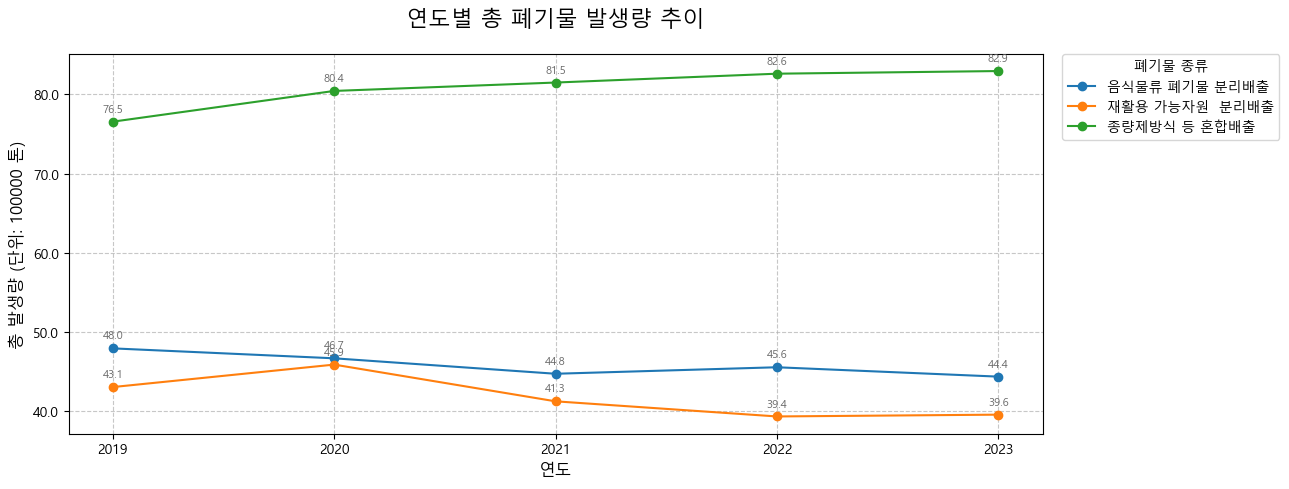

In [116]:
yearly_total = df.groupby(['연도','폐기물_종류'])['발생량'].sum().unstack()

# --- 4. 그래프 그리기 ---
fig, ax = plt.subplots(figsize=(13,5)) # Figure와 Axes 객체 생성

# 데이터 플롯팅
yearly_total.plot(ax=ax, marker='o')

# --- 5. 포인트마다 수치 표시 (핵심 추가 부분!) ---
# Y축 단위 1e5 (10만)로 변경하는 포매터 재활용
scale_factor = 1e5
# 각 컬럼(폐기물_종류)별로 반복하면서 포인트에 수치 표시
for i, col in enumerate(yearly_total.columns):
    for j, val in enumerate(yearly_total[col]):
        # x축 위치는 j (인덱스 순서), y축 위치는 val
        # 텍스트 위치를 마커보다 살짝 위에 띄우기 위해 val * 1.02 (2% 위)
        # 텍스트 포맷팅을 1e5 단위로 맞춤
        ax.annotate(f'{val / scale_factor:.1f}', # 표시할 텍스트 (10만 단위로 소수점 1자리)
                    (yearly_total.index[j], val), # 마커의 x, y 좌표
                    textcoords="offset points", # 텍스트 좌표를 상대적으로 지정
                    xytext=(0,5), # x, y 방향으로 띄울 정도 (픽셀 단위)
                    ha='center', # 수평 정렬 (가운데)
                    va='bottom', # 수직 정렬 (아래 - 텍스트가 위로 올라가도록)
                    fontsize=8, # 폰트 크기
                    color='dimgray' # 폰트 색상
                   )

# --- 5. 그래프 꾸미기 ---
plt.title('연도별 총 폐기물 발생량 추이', fontsize=16, pad=20) # 제목 크기 및 여백 조정
plt.xlabel('연도', fontsize=12) # X축 라벨 크기 조정
plt.ylabel('총 발생량 (톤)', fontsize=12) # Y축 라벨 크기 조정

# X축 틱 라벨 설정 (모든 연도 출력)
# yearly_total.index는 groupby('연도')의 결과로 연도 값들을 가집니다.
plt.xticks(ticks=yearly_total.index, rotation=0) # 겹치지 않는다면 회전 0이 깔끔합니다.
# 만약 연도가 너무 많아 겹치면 rotation=45를 다시 고려하세요.

# Y축 단위 1e5 (10만)로 변경 (이전 대화 내용 반영)
import matplotlib.ticker as mticker
scale_factor = 1e5
def millions_formatter(x, pos):
    return f'{x / scale_factor:.1f}' # 소수점 첫째 자리까지 표시
ax.yaxis.set_major_formatter(mticker.FuncFormatter(millions_formatter))
ax.set_ylabel(f'총 발생량 (단위: {int(scale_factor)} 톤)') # Y축 라벨에 변경된 단위 명시


# 범례 설정
# unstack() 결과, '폐기물_종류'가 컬럼이 되어 각 라인의 범례가 됩니다.
plt.legend(title='폐기물 종류', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)
# bbox_to_anchor와 loc으로 범례를 그래프 밖에 배치하여 그래프 영역 침범 방지

plt.grid(True, linestyle='--', alpha=0.7) # 그리드 라인 스타일 및 투명도 조정
plt.tight_layout() # 그래프 요소들이 겹치지 않도록 자동 조정

plt.show()

['서울' '부산' '대구' '인천' '광주' '대전' '울산' '세종' '경기' '강원' '충북' '충남' '전북' '전남'
 '경북' '경남' '제주']


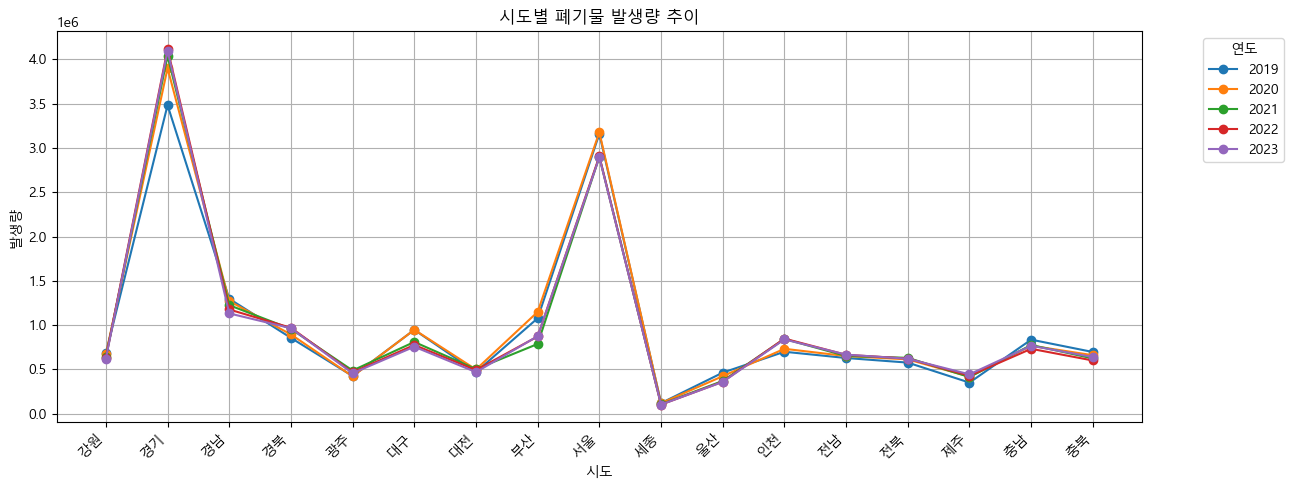

In [61]:
print(df['시도'].unique())

summary = df.groupby(['시도', '연도'])['발생량'].sum().unstack()

summary.plot(figsize=(13,5), marker='o')



plt.title('시도별 폐기물 발생량 추이')
plt.ylabel('발생량')
plt.xlabel('시도')
plt.xticks(ticks=range(len(summary.index)), labels=summary.index, rotation=45, ha='right')
plt.grid(True)
plt.legend(title='연도', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

['서울' '부산' '대구' '인천' '광주' '대전' '울산' '세종' '경기' '강원' '충북' '충남' '전북' '전남'
 '경북' '경남' '제주']


c:\Users\kimsa\anaconda3\envs\tf_cpu\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


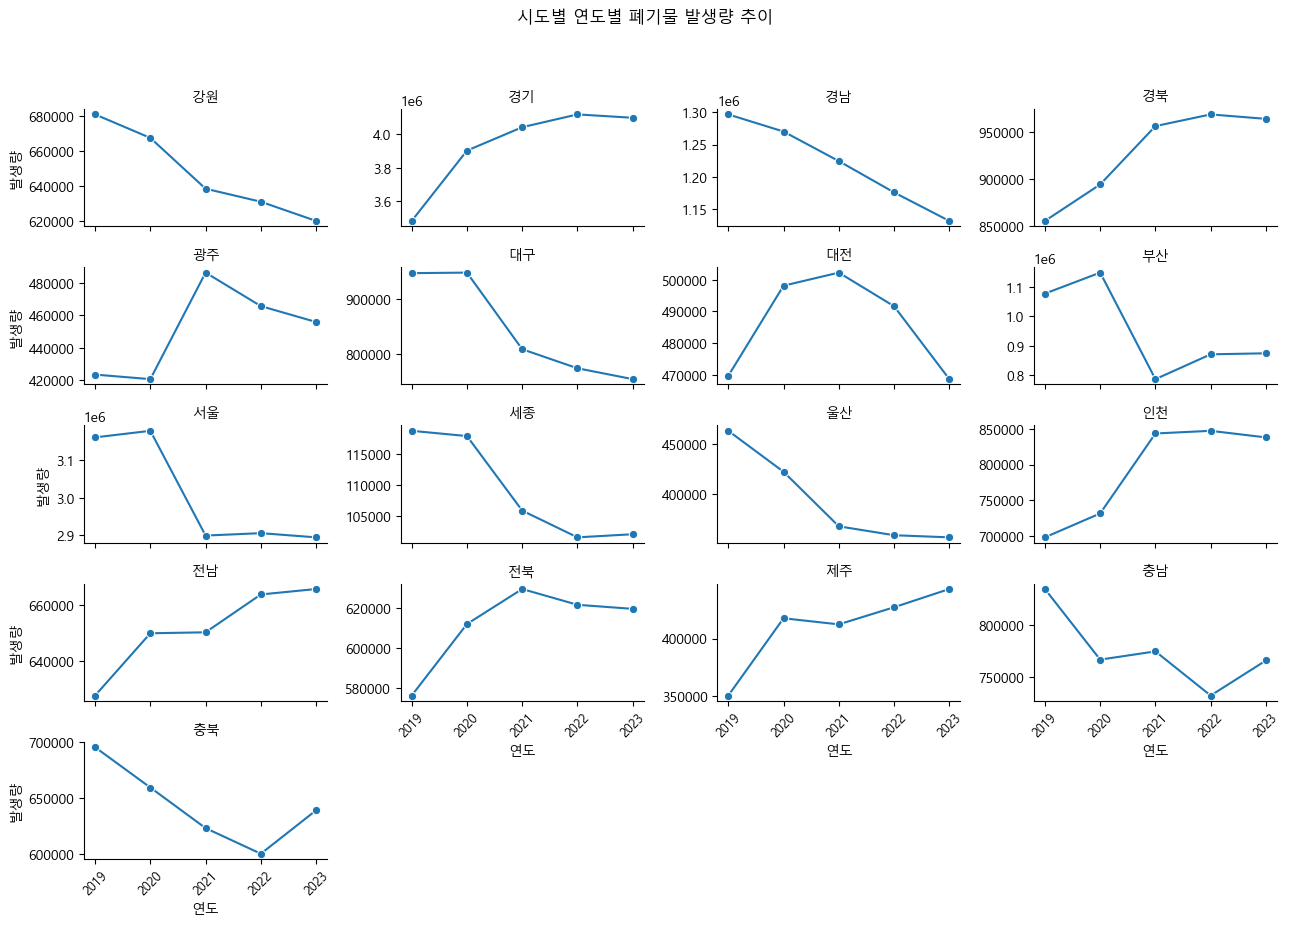

In [90]:
print(df['시도'].unique())

summary = df.groupby(['연도','시도'])['발생량'].sum().reset_index()

g = sns.FacetGrid(summary, col='시도', col_wrap=4, height=2.5, aspect=1.3, sharey=False)
g.map(sns.lineplot, '연도', '발생량', marker='o')

for ax in g.axes.ravel():
    ax.set_xticks(sorted(summary['연도'].unique()))
    ax.tick_params(axis='x', labelrotation=45, labelsize=9)

g.set_titles("{col_name}")
g.set_axis_labels('연도', '발생량')
g.fig.subplots_adjust(top=0.9, hspace=0.35, bottom=0.3)
g.fig.suptitle('시도별 연도별 폐기물 발생량 추이', fontsize=12)

plt.show()

c:\Users\kimsa\anaconda3\envs\tf_cpu\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


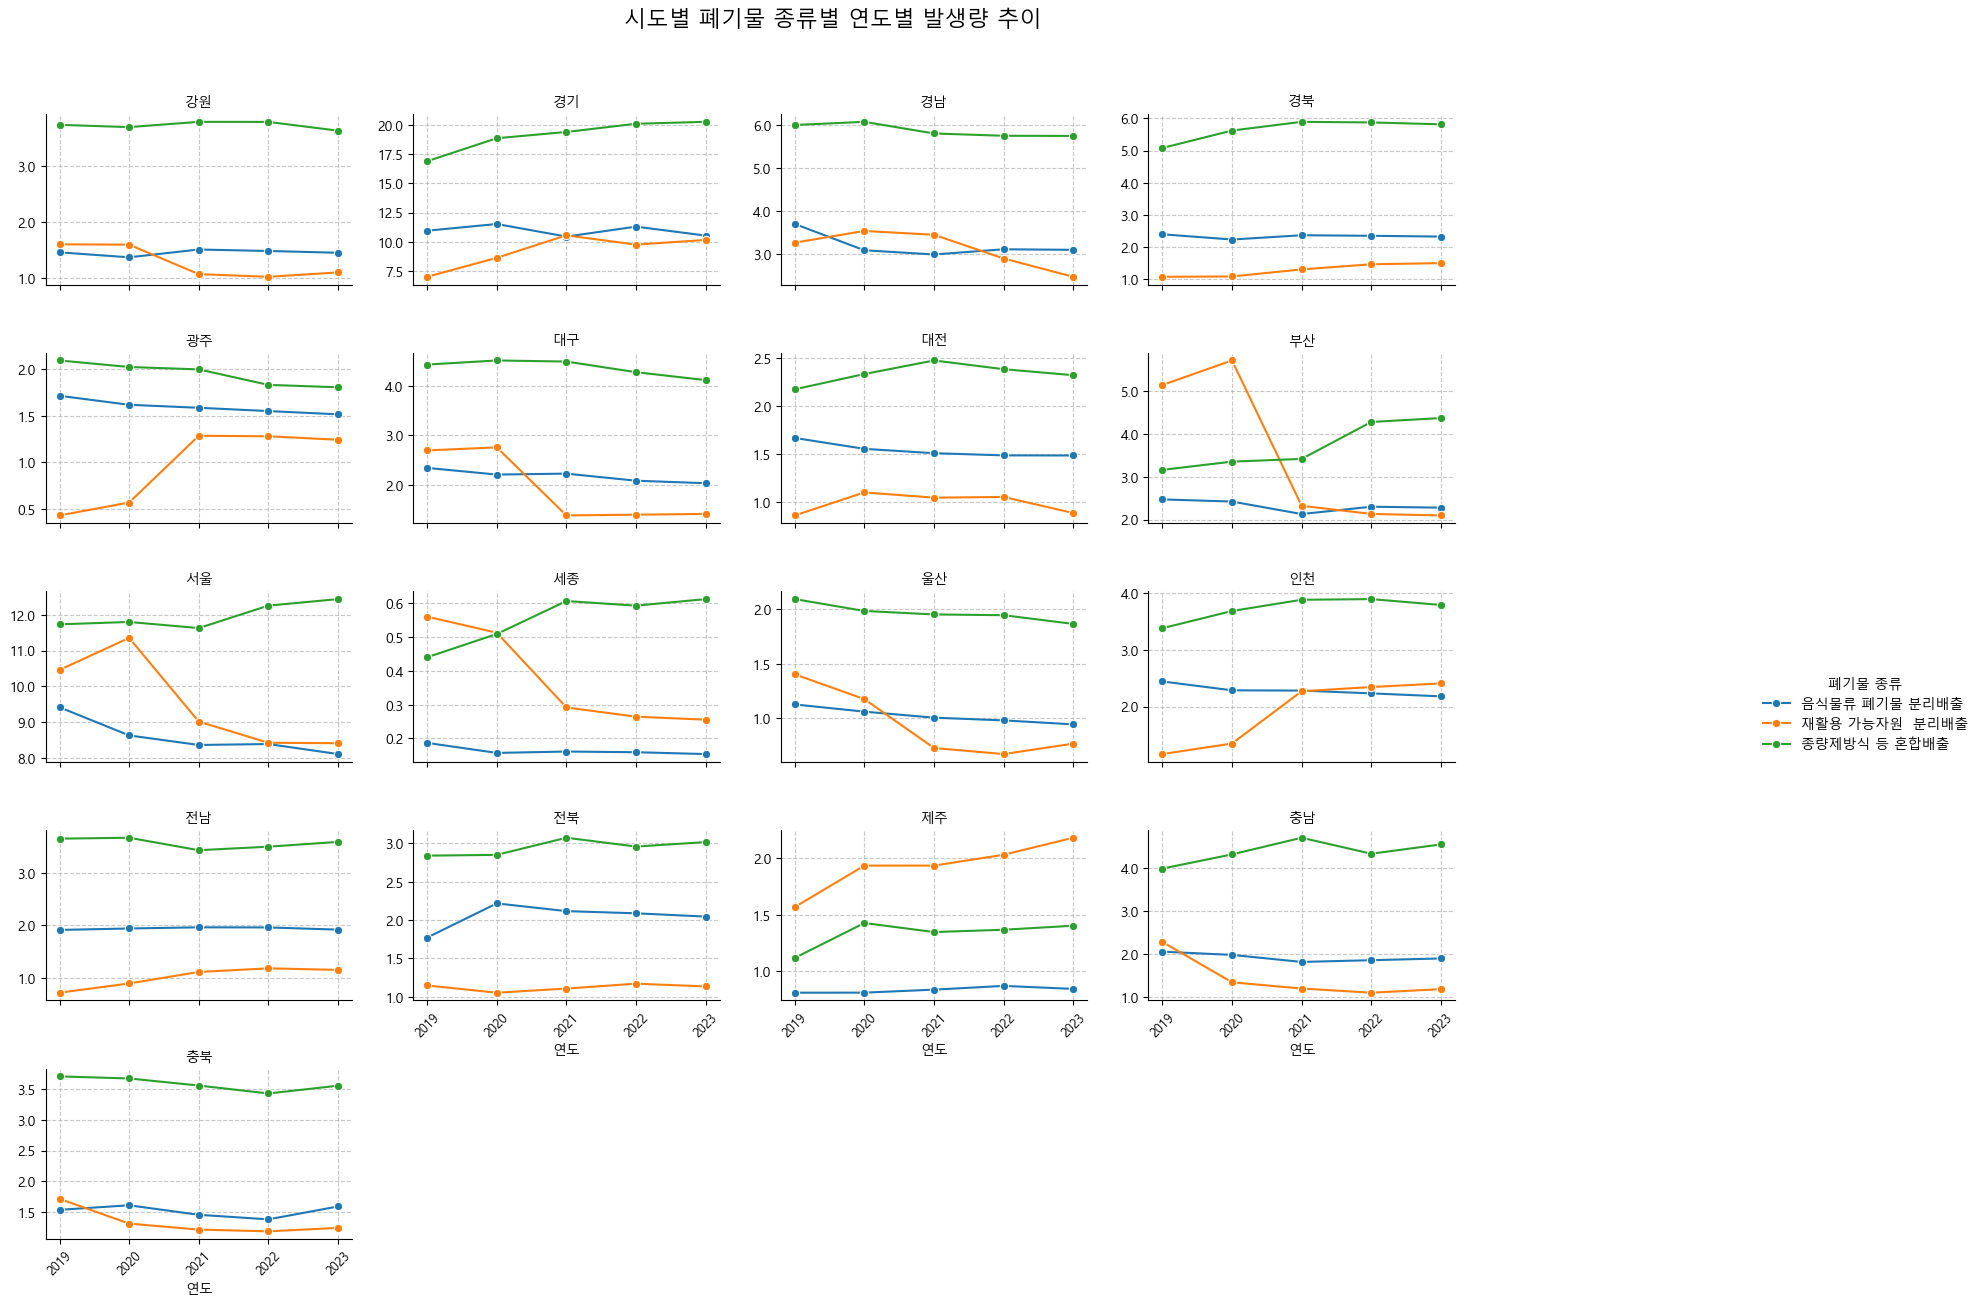

In [118]:
# --- 3. 데이터 그룹화 및 준비 ---
# '시도'별, '연도'별, '폐기물_종류'별 발생량 합계를 구합니다.
# FacetGrid에서 hue를 사용하려면 unstack()을 할 필요 없이 '긴' 형태로 유지해야 합니다.
summary = df.groupby(['시도', '연도', '폐기물_종류'])['발생량'].sum().reset_index()

# Y축 단위를 1e5 (10만)으로 변경하기 위한 스케일 팩터
scale_factor = 1e5


# --- 4. FacetGrid를 사용한 그래프 그리기 ---
# col='시도': 시도별로 서브플롯을 나눔
# hue='폐기물_종류': 폐기물 종류별로 색상(선)을 구분
# sharey=False: 각 서브플롯의 Y축 스케일을 독립적으로 설정 (필요에 따라 True/False 선택)
g = sns.FacetGrid(summary, col='시도', col_wrap=4, height=3, aspect=1.3,
                  sharey=False, hue='폐기물_종류', palette='tab10', legend_out=True) # legend_out=True 중요!

# 라인 플롯 그리기
g.map(sns.lineplot, '연도', '발생량', marker='o')


# --- 5. 각 서브플롯 꾸미기 ---
for ax in g.axes.ravel():
    # X축 틱 라벨 설정 (모든 연도 출력)
    ax.set_xticks(sorted(summary['연도'].unique()))
    ax.tick_params(axis='x', labelrotation=45, labelsize=9)

    # Y축 라벨 포맷팅 (10만 단위)
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x / scale_factor:.1f}'))

    # Y축 라벨 추가 (각 서브플롯에)
    ax.set_ylabel(f'발생량 (단위: {int(scale_factor):,} 톤)', fontsize=10)

    # 그리드 추가
    ax.grid(True, linestyle='--', alpha=0.7)


# --- 6. 전체 그림 제목 및 범례 설정 ---
g.set_titles("{col_name}") # 서브플롯 제목을 '시도' 이름으로 설정
g.set_axis_labels('연도', '') # 각 서브플롯의 Y축 라벨은 위에서 따로 설정했으므로 비워둠

# 범례 추가 (hue에 의해 자동 생성된 범례)
g.add_legend(title='폐기물 종류', bbox_to_anchor=(1.02, 0.5), loc='center left', borderaxespad=0.)
# legend_out=True일 때 bbox_to_anchor로 범례 위치 조정

# 전체 그림의 제목 설정 및 서브플롯 여백 조정
g.fig.subplots_adjust(top=0.9, hspace=0.4, wspace=0.2, bottom=0.15, right=0.85) # right 여백을 더 확보
g.fig.suptitle('시도별 폐기물 종류별 연도별 발생량 추이', fontsize=16, y=0.97) # 전체 제목 위치 조정

plt.show()

['종로구' '중구' '용산구' '성동구' '광진구' '동대문구' '중랑구' '성북구' '강북구' '도봉구' '노원구' '은평구'
 '서대문구' '마포구' '양천구' '강서구' '구로구' '금천구' '영등포구' '동작구' '관악구' '서초구' '강남구' '송파구'
 '강동구']


c:\Users\kimsa\anaconda3\envs\tf_cpu\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


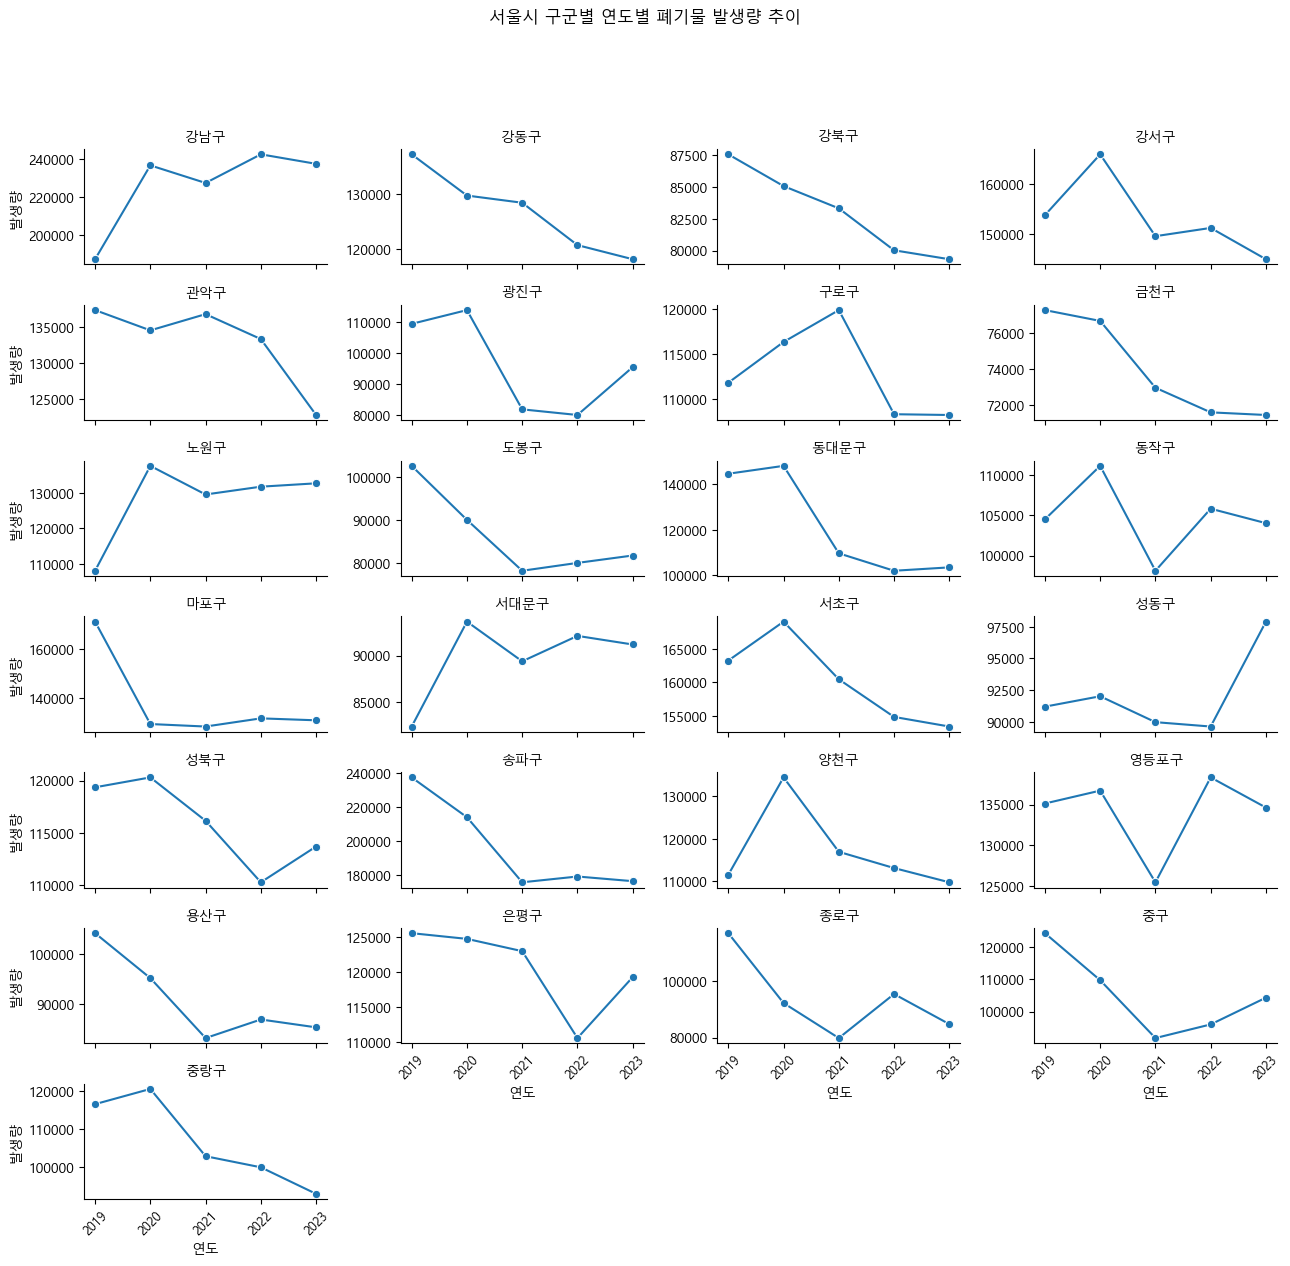

In [130]:
# 서울지역만 추세 확인
df2 = df[df['시도'] == '서울']

print(df2['시군구'].unique())
summary = df2.groupby(['연도','시군구'])['발생량'].sum().reset_index()

g = sns.FacetGrid(summary, col='시군구', col_wrap=4, height=2.5, aspect=1.3, sharey=False)
g.map(sns.lineplot, '연도', '발생량', marker='o')

for ax in g.axes.ravel():
    ax.set_xticks(sorted(summary['연도'].unique()))
    ax.tick_params(axis='x', labelrotation=45, labelsize=9)

g.set_titles("{col_name}")
g.set_axis_labels('연도', '발생량')
g.fig.subplots_adjust(top=0.9, hspace=0.35, bottom=0.3)
g.fig.suptitle('서울시 구군별 연도별 폐기물 발생량 추이', fontsize=12)
 
plt.show()

c:\Users\kimsa\anaconda3\envs\tf_cpu\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


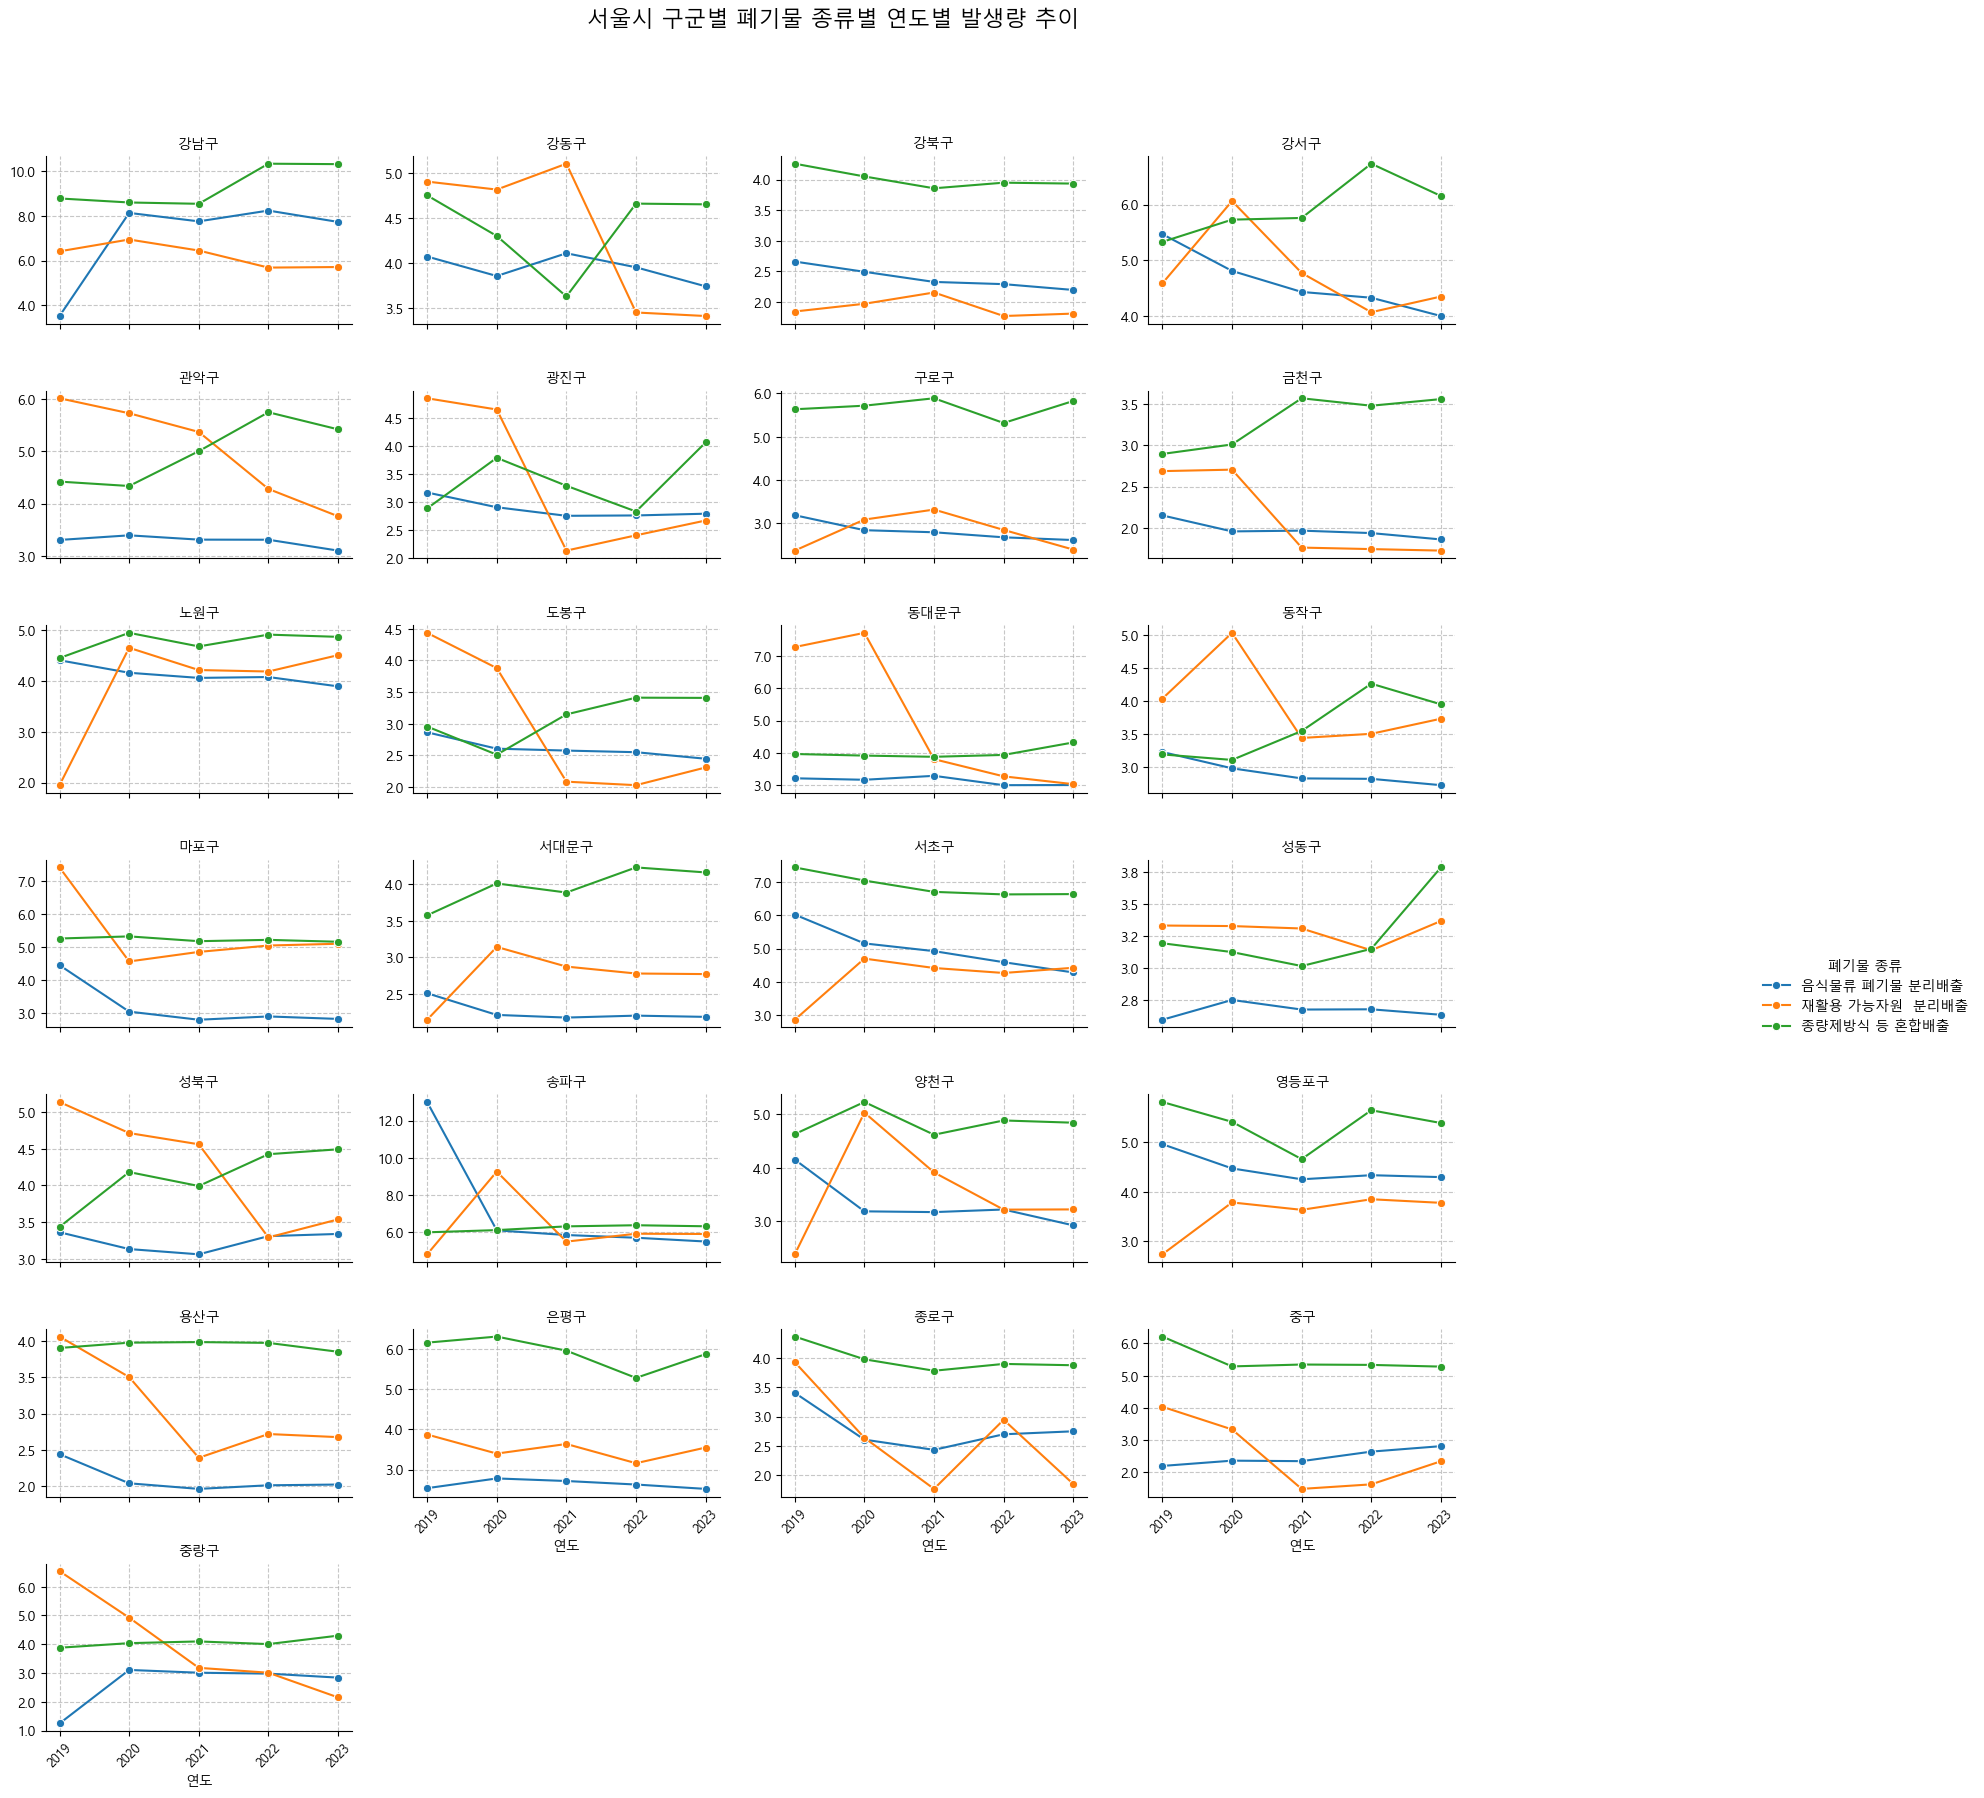

In [127]:
df2 = df[df['시도'] == '서울']

# --- 3. 데이터 그룹화 및 준비 ---
# '시도'별, '연도'별, '폐기물_종류'별 발생량 합계를 구합니다.
# FacetGrid에서 hue를 사용하려면 unstack()을 할 필요 없이 '긴' 형태로 유지해야 합니다.
summary = df2.groupby(['시군구', '연도', '폐기물_종류'])['발생량'].sum().reset_index()

# Y축 단위를 1e5 (10만)으로 변경하기 위한 스케일 팩터
scale_factor = 1e4


# --- 4. FacetGrid를 사용한 그래프 그리기 ---
# col='시도': 시도별로 서브플롯을 나눔
# hue='폐기물_종류': 폐기물 종류별로 색상(선)을 구분
# sharey=False: 각 서브플롯의 Y축 스케일을 독립적으로 설정 (필요에 따라 True/False 선택)
g = sns.FacetGrid(summary, col='시군구', col_wrap=4, height=3, aspect=1.3,
                  sharey=False, hue='폐기물_종류', palette='tab10', legend_out=True) # legend_out=True 중요!

# 라인 플롯 그리기
g.map(sns.lineplot, '연도', '발생량', marker='o')


# --- 5. 각 서브플롯 꾸미기 ---
for ax in g.axes.ravel():
    # X축 틱 라벨 설정 (모든 연도 출력)
    ax.set_xticks(sorted(summary['연도'].unique()))
    ax.tick_params(axis='x', labelrotation=45, labelsize=9)

    # Y축 라벨 포맷팅 (10만 단위)
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x / scale_factor:.1f}'))

    # Y축 라벨 추가 (각 서브플롯에)
    ax.set_ylabel(f'발생량 (단위: {int(scale_factor):,} 톤)', fontsize=10)

    # 그리드 추가
    ax.grid(True, linestyle='--', alpha=0.7)


# --- 6. 전체 그림 제목 및 범례 설정 ---
g.set_titles("{col_name}") # 서브플롯 제목을 '시도' 이름으로 설정
g.set_axis_labels('연도', '') # 각 서브플롯의 Y축 라벨은 위에서 따로 설정했으므로 비워둠

# 범례 추가 (hue에 의해 자동 생성된 범례)
g.add_legend(title='폐기물 종류', bbox_to_anchor=(1.02, 0.5), loc='center left', borderaxespad=0.)
# legend_out=True일 때 bbox_to_anchor로 범례 위치 조정

# 전체 그림의 제목 설정 및 서브플롯 여백 조정
g.fig.subplots_adjust(top=0.9, hspace=0.4, wspace=0.2, bottom=0.15, right=0.85) # right 여백을 더 확보
g.fig.suptitle('서울시 구군별 폐기물 종류별 연도별 발생량 추이', fontsize=16, y=0.97) # 전체 제목 위치 조정

plt.show()

['중구' '서구' '동구' '영도구' '부산진구' '동래구' '남구' '북구' '해운대구' '사하구' '금정구' '강서구'
 '연제구' '수영구' '사상구' '기장군']


c:\Users\kimsa\anaconda3\envs\tf_cpu\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


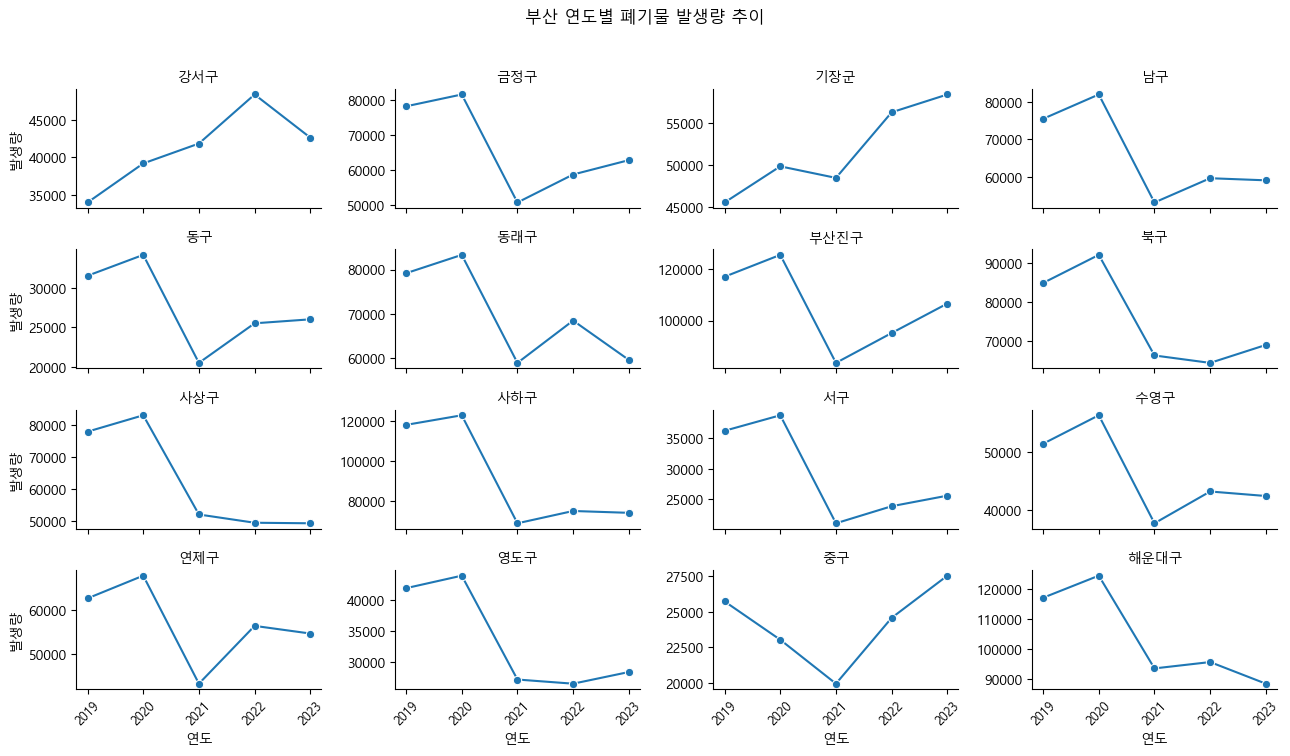

In [129]:
# 부산지역만 추세 확인
df2 = df[df['시도'] == '부산']

print(df2['시군구'].unique())
summary = df2.groupby(['연도','시군구'])['발생량'].sum().reset_index()

g = sns.FacetGrid(summary, col='시군구', col_wrap=4, height=2.5, aspect=1.3, sharey=False)
g.map(sns.lineplot, '연도', '발생량', marker='o')

for ax in g.axes.ravel():
    ax.set_xticks(sorted(summary['연도'].unique()))
    ax.tick_params(axis='x', labelrotation=45, labelsize=9)

g.set_titles("{col_name}")
g.set_axis_labels('연도', '발생량')
g.fig.subplots_adjust(top=0.9, hspace=0.35, bottom=0.3)
g.fig.suptitle('부산시 연도별 폐기물 발생량 추이', fontsize=12)
 
plt.show()

c:\Users\kimsa\anaconda3\envs\tf_cpu\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


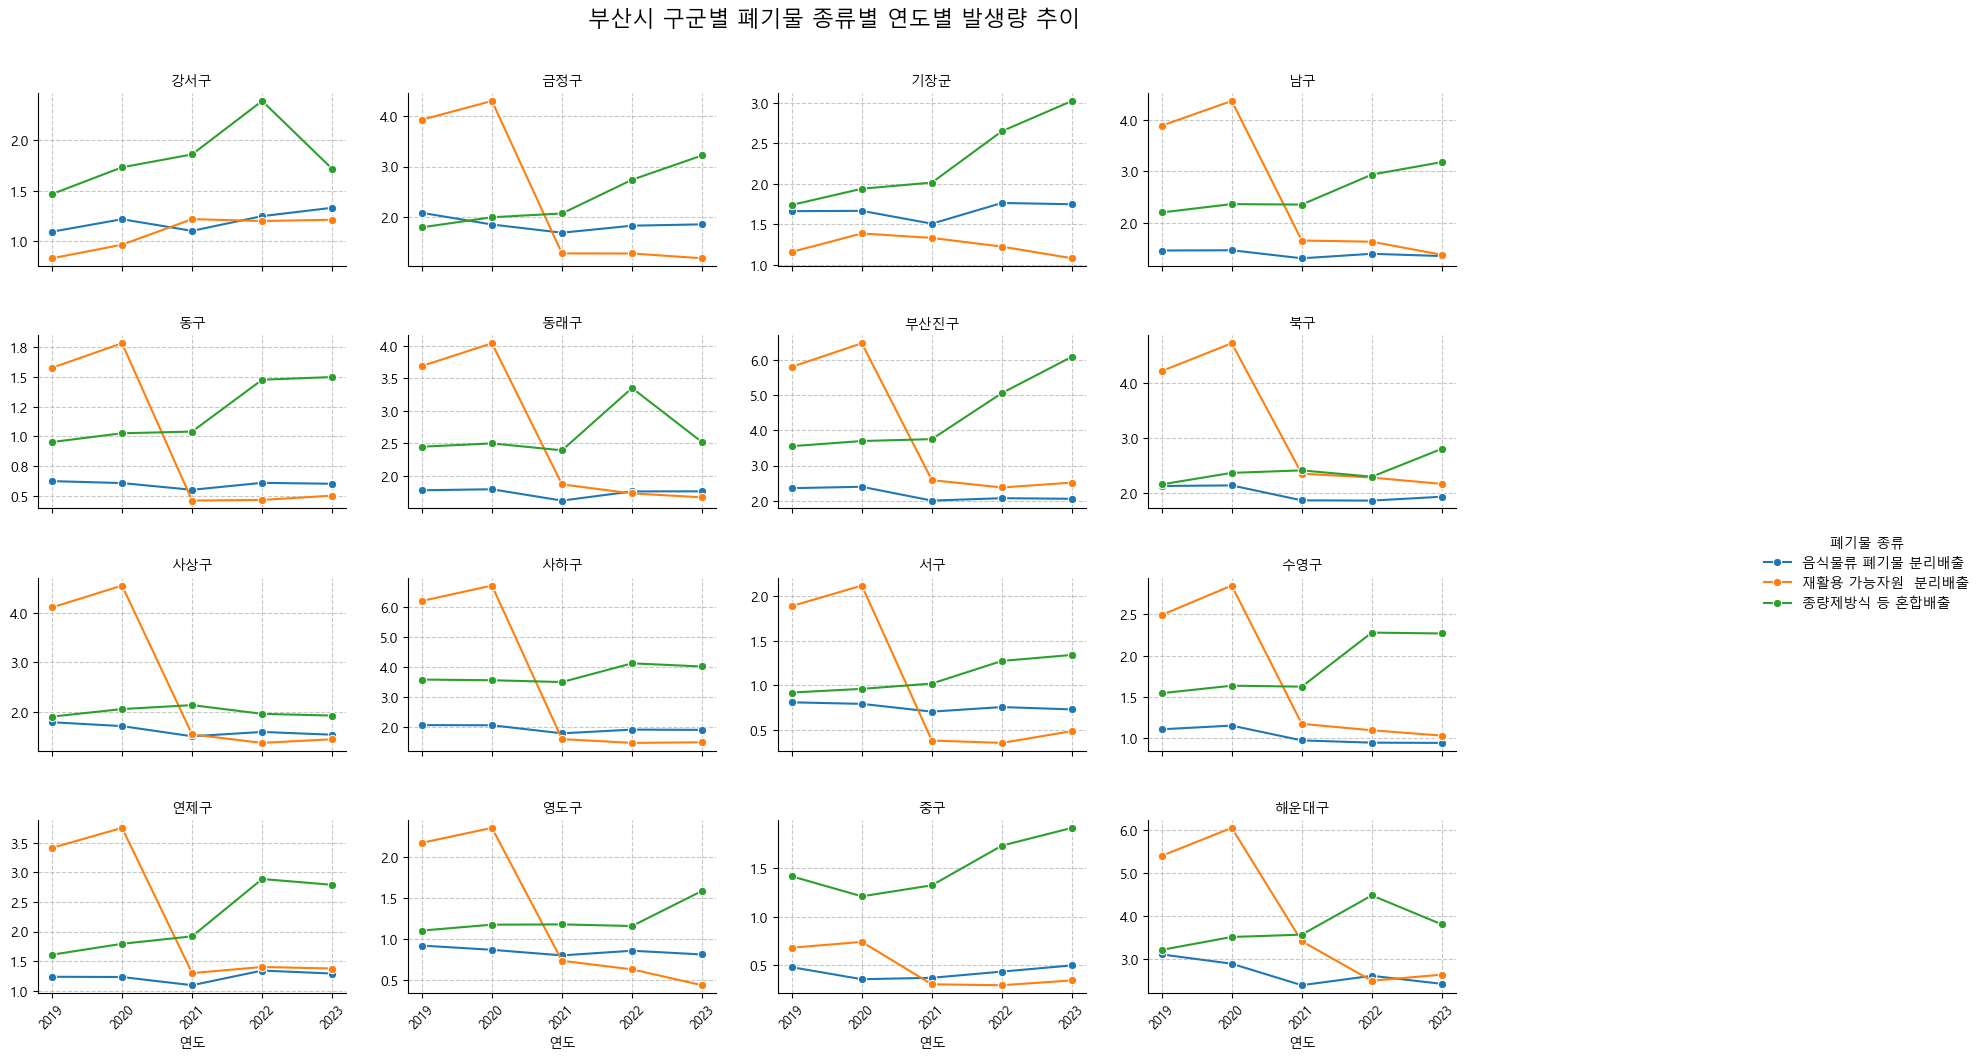

In [126]:
df2 = df[df['시도'] == '부산']

# --- 3. 데이터 그룹화 및 준비 ---
# '시도'별, '연도'별, '폐기물_종류'별 발생량 합계를 구합니다.
# FacetGrid에서 hue를 사용하려면 unstack()을 할 필요 없이 '긴' 형태로 유지해야 합니다.
summary = df2.groupby(['시군구', '연도', '폐기물_종류'])['발생량'].sum().reset_index()

# Y축 단위를 1e5 (10만)으로 변경하기 위한 스케일 팩터
scale_factor = 1e4


# --- 4. FacetGrid를 사용한 그래프 그리기 ---
# col='시도': 시도별로 서브플롯을 나눔
# hue='폐기물_종류': 폐기물 종류별로 색상(선)을 구분
# sharey=False: 각 서브플롯의 Y축 스케일을 독립적으로 설정 (필요에 따라 True/False 선택)
g = sns.FacetGrid(summary, col='시군구', col_wrap=4, height=3, aspect=1.3,
                  sharey=False, hue='폐기물_종류', palette='tab10', legend_out=True) # legend_out=True 중요!

# 라인 플롯 그리기
g.map(sns.lineplot, '연도', '발생량', marker='o')


# --- 5. 각 서브플롯 꾸미기 ---
for ax in g.axes.ravel():
    # X축 틱 라벨 설정 (모든 연도 출력)
    ax.set_xticks(sorted(summary['연도'].unique()))
    ax.tick_params(axis='x', labelrotation=45, labelsize=9)

    # Y축 라벨 포맷팅 (10만 단위)
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x / scale_factor:.1f}'))

    # Y축 라벨 추가 (각 서브플롯에)
    ax.set_ylabel(f'발생량 (단위: {int(scale_factor):,} 톤)', fontsize=10)

    # 그리드 추가
    ax.grid(True, linestyle='--', alpha=0.7)


# --- 6. 전체 그림 제목 및 범례 설정 ---
g.set_titles("{col_name}") # 서브플롯 제목을 '시도' 이름으로 설정
g.set_axis_labels('연도', '') # 각 서브플롯의 Y축 라벨은 위에서 따로 설정했으므로 비워둠

# 범례 추가 (hue에 의해 자동 생성된 범례)
g.add_legend(title='폐기물 종류', bbox_to_anchor=(1.02, 0.5), loc='center left', borderaxespad=0.)
# legend_out=True일 때 bbox_to_anchor로 범례 위치 조정

# 전체 그림의 제목 설정 및 서브플롯 여백 조정
g.fig.subplots_adjust(top=0.9, hspace=0.4, wspace=0.2, bottom=0.15, right=0.85) # right 여백을 더 확보
g.fig.suptitle('부산시 구군별 폐기물 종류별 연도별 발생량 추이', fontsize=16, y=0.97) # 전체 제목 위치 조정

plt.show()

# 재활용에서 어떤 재활용이 2021년도에 줄어들었는지 확인해봐야하나
# 2018 : 436,175
# 2017 : 457,783
# 2016 : 457,345
# 2015 : 464.718
# 2014 : 477,420

['중구' '동구' '서구' '남구' '북구' '수성구' '달서구' '달성군' '군위군']


c:\Users\kimsa\anaconda3\envs\tf_cpu\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


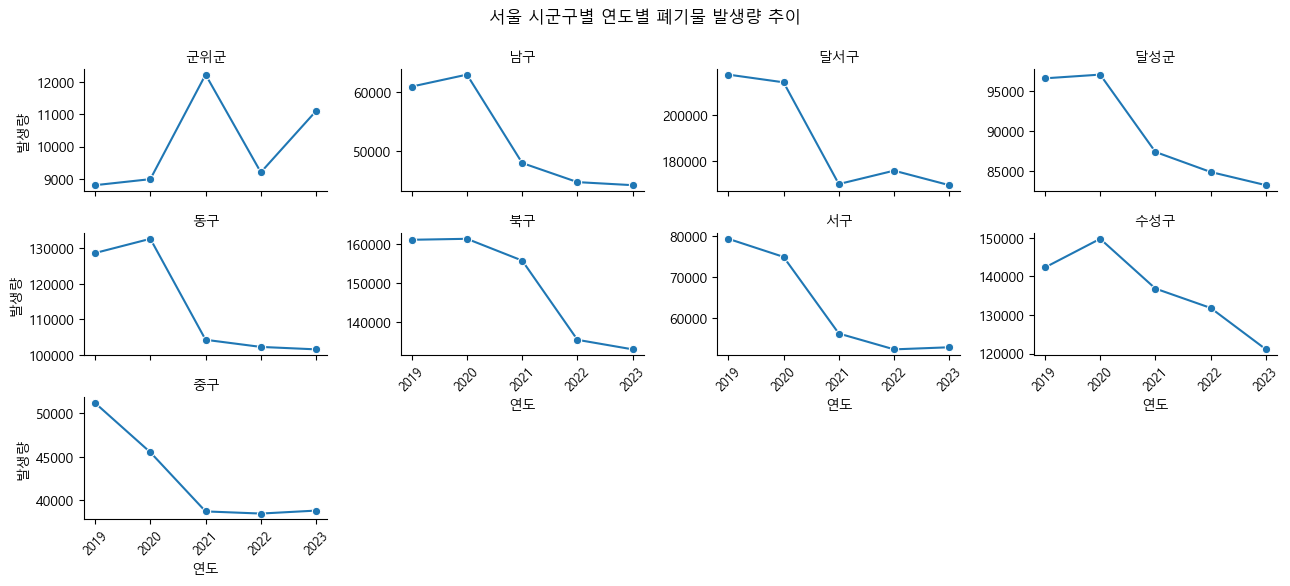

In [98]:
# 부산과 비슷한 대구 추세 확인
df2 = df[df['시도'] == '대구']

print(df2['시군구'].unique())
summary = df2.groupby(['연도','시군구'])['발생량'].sum().reset_index()

g = sns.FacetGrid(summary, col='시군구', col_wrap=4, height=2.5, aspect=1.3, sharey=False)
g.map(sns.lineplot, '연도', '발생량', marker='o')

for ax in g.axes.ravel():
    ax.set_xticks(sorted(summary['연도'].unique()))
    ax.tick_params(axis='x', labelrotation=45, labelsize=9)

g.set_titles("{col_name}")
g.set_axis_labels('연도', '발생량')
g.fig.subplots_adjust(top=0.9, hspace=0.35, bottom=0.3)
g.fig.suptitle('서울 시군구별 연도별 폐기물 발생량 추이', fontsize=12)
 
plt.show()

c:\Users\kimsa\anaconda3\envs\tf_cpu\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


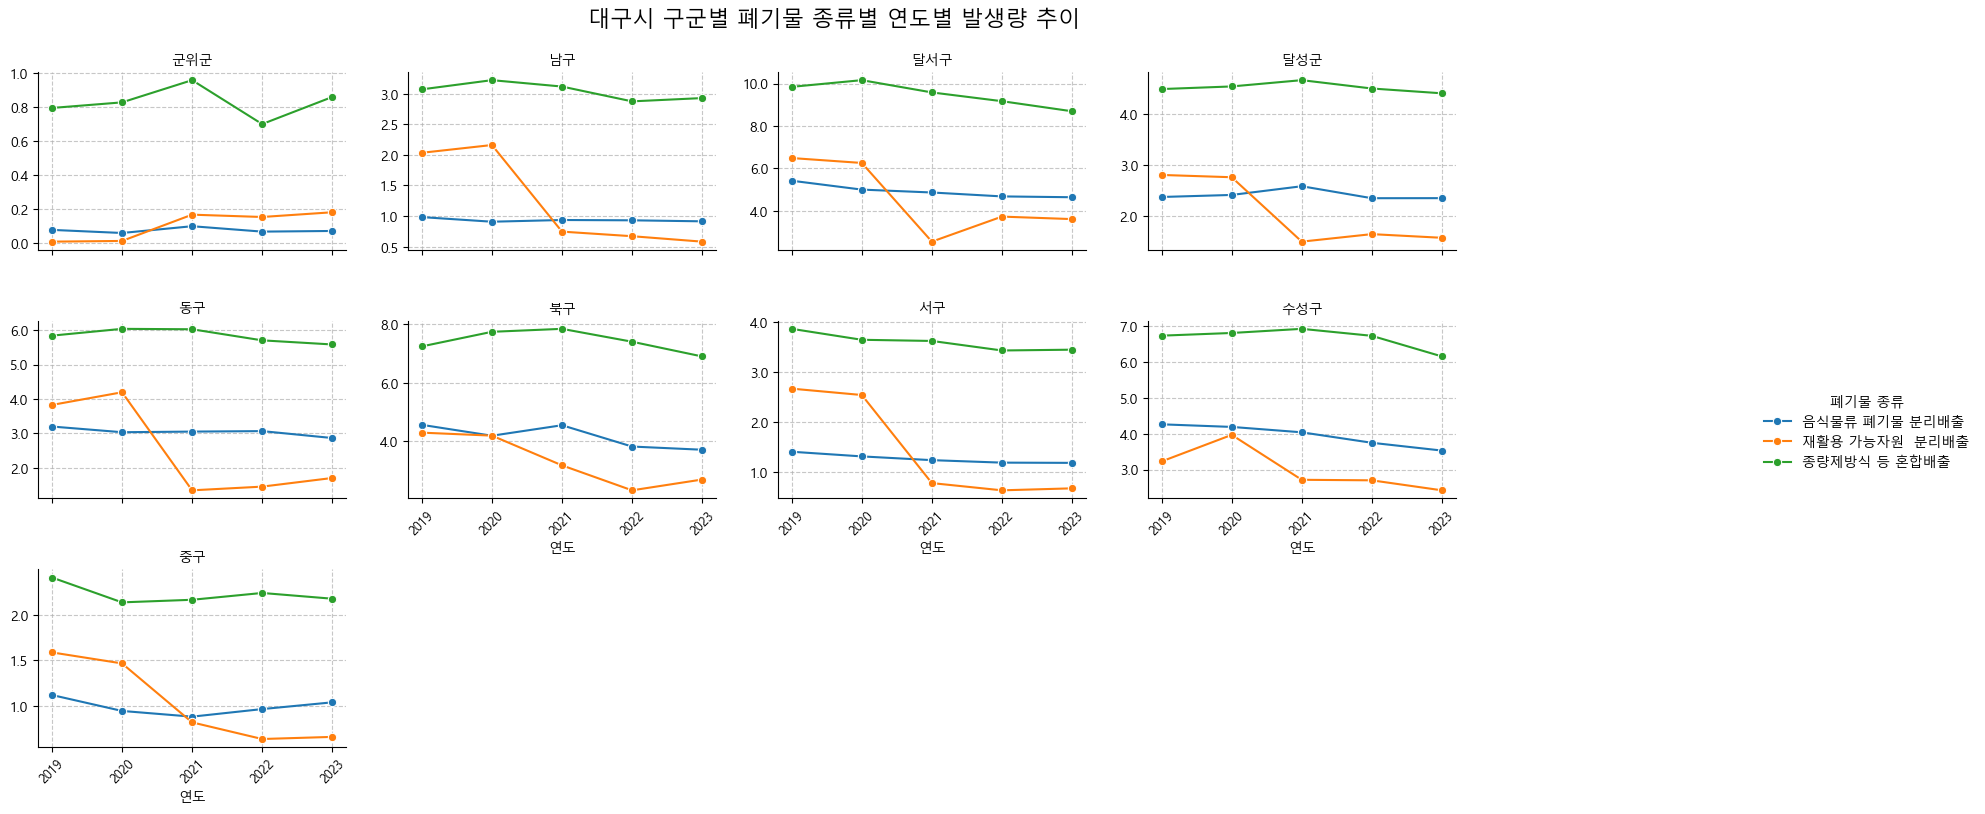

In [125]:
df2 = df[df['시도'] == '대구']

# --- 3. 데이터 그룹화 및 준비 ---
# '시도'별, '연도'별, '폐기물_종류'별 발생량 합계를 구합니다.
# FacetGrid에서 hue를 사용하려면 unstack()을 할 필요 없이 '긴' 형태로 유지해야 합니다.
summary = df2.groupby(['시군구', '연도', '폐기물_종류'])['발생량'].sum().reset_index()

# Y축 단위를 1e5 (10만)으로 변경하기 위한 스케일 팩터
scale_factor = 1e4


# --- 4. FacetGrid를 사용한 그래프 그리기 ---
# col='시도': 시도별로 서브플롯을 나눔
# hue='폐기물_종류': 폐기물 종류별로 색상(선)을 구분
# sharey=False: 각 서브플롯의 Y축 스케일을 독립적으로 설정 (필요에 따라 True/False 선택)
g = sns.FacetGrid(summary, col='시군구', col_wrap=4, height=3, aspect=1.3,
                  sharey=False, hue='폐기물_종류', palette='tab10', legend_out=True) # legend_out=True 중요!

# 라인 플롯 그리기
g.map(sns.lineplot, '연도', '발생량', marker='o')


# --- 5. 각 서브플롯 꾸미기 ---
for ax in g.axes.ravel():
    # X축 틱 라벨 설정 (모든 연도 출력)
    ax.set_xticks(sorted(summary['연도'].unique()))
    ax.tick_params(axis='x', labelrotation=45, labelsize=9)

    # Y축 라벨 포맷팅 (10만 단위)
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x / scale_factor:.1f}'))

    # Y축 라벨 추가 (각 서브플롯에)
    ax.set_ylabel(f'발생량 (단위: {int(scale_factor):,} 톤)', fontsize=10)

    # 그리드 추가
    ax.grid(True, linestyle='--', alpha=0.7)


# --- 6. 전체 그림 제목 및 범례 설정 ---
g.set_titles("{col_name}") # 서브플롯 제목을 '시도' 이름으로 설정
g.set_axis_labels('연도', '') # 각 서브플롯의 Y축 라벨은 위에서 따로 설정했으므로 비워둠

# 범례 추가 (hue에 의해 자동 생성된 범례)
g.add_legend(title='폐기물 종류', bbox_to_anchor=(1.02, 0.5), loc='center left', borderaxespad=0.)
# legend_out=True일 때 bbox_to_anchor로 범례 위치 조정

# 전체 그림의 제목 설정 및 서브플롯 여백 조정
g.fig.subplots_adjust(top=0.9, hspace=0.4, wspace=0.2, bottom=0.15, right=0.85) # right 여백을 더 확보
g.fig.suptitle('대구시 구군별 폐기물 종류별 연도별 발생량 추이', fontsize=16, y=0.97) # 전체 제목 위치 조정

plt.show()

In [128]:
# 서울시도 종량제 혼합배출에 재활용이 있는지
# 부산은 종량제 혼합배출에 재활용이 있다